In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

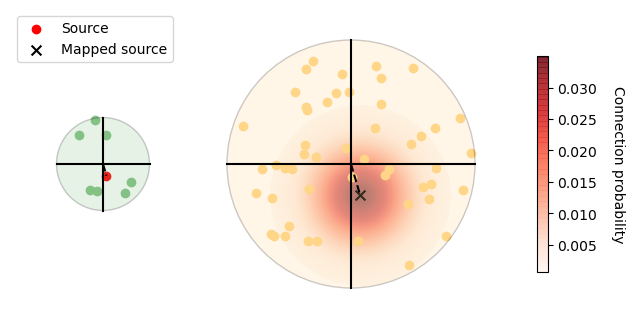

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return (rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return (x, y)

# Function to generate random points inside a circle
def generate_random_points_inside_circle(center, radius, num_points):
    angles = 2 * np.pi * np.random.rand(num_points)
    radii = radius * np.sqrt(np.random.rand(num_points))
    x_points = center[0] + radii * np.cos(angles)
    y_points = center[1] + radii * np.sin(angles)
    return x_points, y_points

# Circle 1 parameters
circle1_center = (100, 500)
circle1_radius = 400

# Circle 2 parameters
circle2_center = (-700, 500)
circle2_radius = 150

radius_ratio = circle2_radius / circle1_radius

# Number of random points to generate inside each circle
num_points_inside_circle1 = 50
num_points_inside_circle2 = int(num_points_inside_circle1 * radius_ratio**2)

# Generate random points inside Circle 1
x_points_circle1, y_points_circle1 = generate_random_points_inside_circle(circle1_center, circle1_radius, num_points_inside_circle1)

# Generate random points inside Circle 2
x_points_circle2, y_points_circle2 = generate_random_points_inside_circle(circle2_center, circle2_radius, num_points_inside_circle2)

# Plotting
plt.figure(figsize=(8, 8))
circle1 = plt.Circle(circle1_center, circle1_radius, edgecolor='black', facecolor='#ffd588', alpha=0.2, fill=True)
circle2 = plt.Circle(circle2_center, circle2_radius, edgecolor='black', facecolor='#84c184', alpha=0.2, fill=True)


plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

plt.scatter(x_points_circle1, y_points_circle1, color='#ffd588')
plt.scatter(x_points_circle2, y_points_circle2, color='#84c184')

# give a radom x and y within circle 1
x, y = generate_random_points_inside_circle(circle1_center, circle1_radius*0.7, 1)
r, phi = cart2pol(x-circle1_center[0], y-circle1_center[1])
projected_x, projected_z = pol2cart(r*radius_ratio, phi)
plt.scatter(projected_x+circle2_center[0], projected_z+circle2_center[1], color='red', label='Source')
plt.scatter(x, y, color='k', marker='x', s=50, label='Mapped source')
x = x[0]
y = y[0]
projected_x = projected_x[0]
projected_z = projected_z[0]
r = r[0]
phi = phi[0]

# draw axis in circle1_center and circle2_center
plt.plot([circle1_center[0]-circle1_radius, circle1_center[0]+circle1_radius], [circle1_center[1], circle1_center[1]], color='black')
plt.plot([circle1_center[0], circle1_center[0]], [circle1_center[1]-circle1_radius, circle1_center[1]+circle1_radius], color='black')
plt.plot([circle2_center[0]-circle2_radius, circle2_center[0]+circle2_radius], [circle2_center[1], circle2_center[1]], color='black')
plt.plot([circle2_center[0], circle2_center[0]], [circle2_center[1]-circle2_radius, circle2_center[1]+circle2_radius], color='black')

# include a dashed line from the circle center to the red random point
plt.plot([circle1_center[0], x], [circle1_center[1], y], color='black', linestyle='dashed')
plt.plot([circle2_center[0], projected_x+circle2_center[0]], [circle2_center[1], projected_z+circle2_center[1]], color='black', linestyle='dashed')

r = np.sqrt((x-circle1_center[0])**2 + (y-circle1_center[1])**2)
circle3_center = (x, y)
circle3_radius = circle1_radius - r

# Create a grid of points inside Circle 2
x_grid, y_grid = np.meshgrid(np.linspace(x - circle3_radius, x + circle3_radius, 500),
                             np.linspace(y - circle3_radius, y + circle3_radius, 500))

# Calculate radial distances from the center of Circle 2
r_grid = np.sqrt((x_grid - x)**2 + (y_grid - y)**2)

# apply a circular mask to the r_grid
r_grid = np.ma.masked_where(r_grid > circle3_radius, r_grid)

# Define the Gaussian color heatmap
sigma = 148
color_heatmap = 0.035 * np.exp(-(r_grid**2) / (sigma**2))

# Create the Gaussian color heatmap inside Circle 2
plt.imshow(color_heatmap, extent=[circle3_center[0] - circle3_radius, circle3_center[0] + circle3_radius,
                                  circle3_center[1] - circle3_radius, circle3_center[1] + circle3_radius],
           cmap='Reds', origin='lower', alpha=0.6, aspect='auto')

# Include colorbar
cbar = plt.colorbar(shrink=0.35, pad=-0.05)
cbar.set_label('Connection probability', rotation=270, labelpad=20)


plt.xlim(-1000, 800)
plt.ylim(0, 1000)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.title('Random Points in Circles')
plt.legend(loc='upper left')
plt.grid(False)
plt.axis('off')
# set equal aspect
plt.gca().set_aspect('equal', adjustable='box')

# plt.savefig('LM_V1_connectivity_scheme.png', dpi=1000, transparent = True)

plt.show()